In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt
import mysql.connector

In [2]:
def make_connection_with_db():
    connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="wp_ecommerce")
    cursor = connection.cursor(dictionary=True)
    return connection,cursor 


In [46]:
def get_categories_sales(): 
    connection,cursor  = make_connection_with_db()
   
    try:
        connection, cursor = make_connection_with_db()

        # Step 1: Get all prodcut sumsales [term_id,name,sumsales]
        sql = """ 
            select wp_term_taxonomy.term_id as category_id ,wp_terms.name as category_name, sum(wp_wc_order_product_lookup.product_qty) as sales
            from wp_wc_order_product_lookup 
            join wp_term_relationships on wp_wc_order_product_lookup.product_id = wp_term_relationships.object_id 
            join wp_term_taxonomy on wp_term_taxonomy.term_taxonomy_id = wp_term_relationships.term_taxonomy_id
            join wp_terms on wp_term_taxonomy.term_id = wp_terms.term_id 
            where wp_term_taxonomy.taxonomy = 'product_cat'
            GROUP By wp_term_taxonomy.term_id
        """
        cursor.execute(sql)
        categories_data = cursor.fetchall()
        # print(categories_data)
        if not categories_data:
            print("No Category found .")
            return df # Return empty DataFrame

        df = pd.DataFrame(columns=['category_id', 'category_name', 'sales'])
        categoies_info = [ row for row in categories_data ]      
        df = pd.DataFrame(categoies_info)
        # Ensure data types are correct if not already handled by cursor(dictionary=True)
        df['category_id'] = df['category_id'].astype(int)
        df['sales'] = df['sales'].astype(int)
        # for row in categories_data:
        #     category_id = int(row['category_id'])
        #     category_name= row['category_name']
        #     sales = int(row['sales'])

        #     category_obj = {'category_id':category_id, 'category_name':category_name, 'sales':sales}
        #     category - pd.DataFrame(category_obj)
        #     df=pd.concat([df,category],ignore_index=True)
           
    except mysql.connector.Error as err:
        print(f"Database error: {err}")
        # Optionally, log the error for debugging
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        # Optionally, log the error for debugging
    finally:
        # Ensure cursor and connection are closed
        if cursor:
            cursor.close()
        if connection:
            connection.close()
    return df


In [26]:
get_categories_sales()


,category_id,category_name,sales
0,74,ملابس رجالي,2044
1,75,ملابس نسائي,2248
2,76,أحذية رجالي,1283
3,77,أحذية نسائي,758
4,78,إلكترونيات,1392
5,79,مستحضرات تجميل,905
6,82,إكسسوارات,506


In [47]:
def show_categories_sales_bar():
    df =get_categories_sales() 
    import arabic_reshaper 
    from bidi.algorithm import get_display 

    df['category_name'] =  df['category_name'].apply(lambda x : get_display(arabic_reshaper.reshape(x)))
    
    x =  df['category_name']
    y = df['sales'] 
    plt.figure(figsize=(10,7))
    plt.bar(x,y)
    plt.xlabel('Cateegory Name')
    plt.ylabel('Sales')
    plt.title("Sales per Category")

    colors = [np.random.rand(3,) for _ in range(len(x))] 
    bars = plt.bar(x,y,color=colors) 
    for bar in bars :
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2, # X-position: center of the bar
            height + 5, # Y-position: slightly above the bar
            f'{int(height)}', # The text to display
            ha='center', # Horizontal alignment: center
            va='bottom', # Vertical alignment: bottom
            fontsize=10
        )
       
       
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()

    



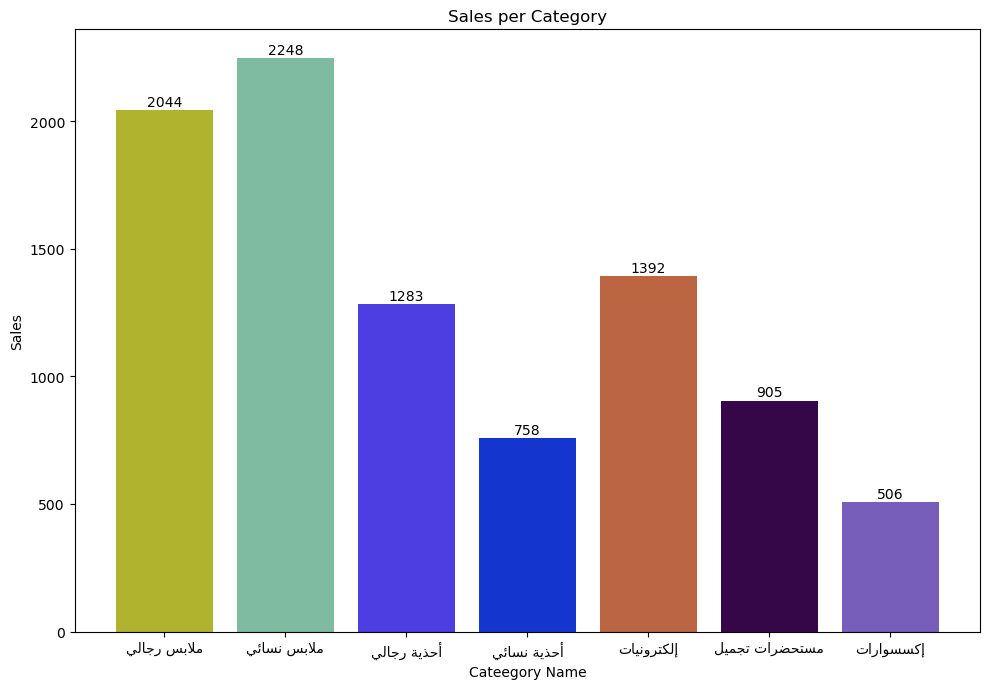

In [48]:
show_categories_sales_bar()

In [65]:
def show_categories_sales_pie():
    df =get_categories_sales() 
    import arabic_reshaper 
    from bidi.algorithm import get_display 

    df['category_name'] =  df['category_name'].apply(lambda x : get_display(arabic_reshaper.reshape(x)))
   
    plt.figure(figsize=(10,7))
    # Create the pie chart
    # autopct='%%0.1f%%' correctly displays the percentage with one decimal place and a '%' sign
    plt.pie(df['sales'], labels=df['category_name'], autopct='%%%.1f%%', startangle=90)

    # Add a title to the pie chart
    plt.title("Sales Distribution per Category")
       
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()

    



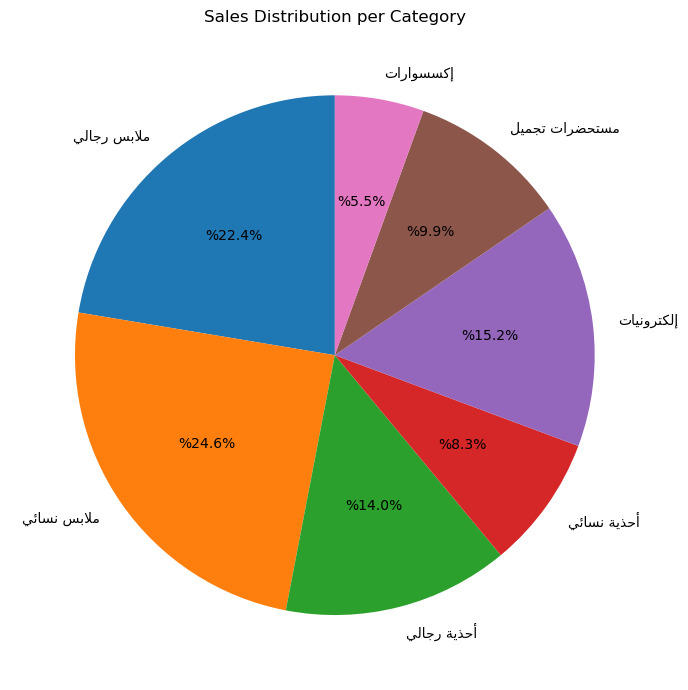

In [66]:
show_categories_sales_pie()